# Benchmark Visualization

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings
warnings.simplefilter("default")
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

def set_plotting_style(palette="mako"):
    # This sets reasonable defaults for font size for a figure that will go in a paper
    sns.set_context("paper")
    # Set the font to be serif, rather than sans
    sns.set(font='serif')

    # define colors
    sns.set_palette(palette, n_colors=9)
    # project_even_cols = [[44 / 255, 25 / 255, 149 / 255, .75], [147 / 255, 41 / 255, 223 / 255, .75],[0 / 255, 9 / 255, 43 / 255, .75]]

    # Make the background white, and specify the font family
    sns.set_style("ticks", {"font.family": "serif", "font.serif": ["Times", "Palatino", "serif"]})
    
set_plotting_style()
palette="mako"

In [39]:
# import processing routines
import sys
sys.path.insert(1, '/Users/schroerk/Code/Research/EVCC_Sim/')
import Utilities.sim_output_processing as proc
import Utilities.sim_input_processing as input_proc

In [40]:
#solutions = ["RL_[64,64]_high_learning_iterations","Opt"]
solutions = ["RL","Opt"]
weeks = list(np.arange(0,12,1))
states = list(np.arange(0,10,1))
path = "/Volumes/karsten.schroer@uni-koeln.de/Uni/raw_output/raw_output/" 
file = "Decision_Variables_Opt.csv"

In [41]:
test_weeks=[pd.to_datetime('2019-01-07 00:00:00'),
 pd.to_datetime('2019-02-04 00:00:00'),
 pd.to_datetime('2019-03-04 00:00:00'),
 pd.to_datetime('2019-04-15 00:00:00'),
 pd.to_datetime('2019-05-06 00:00:00'),
 pd.to_datetime('2019-06-03 00:00:00'),
 pd.to_datetime('2019-07-15 00:00:00'),
 pd.to_datetime('2019-08-05 00:00:00'),
 pd.to_datetime('2019-09-16 00:00:00'),
 pd.to_datetime('2019-10-07 00:00:00'),
 pd.to_datetime('2019-11-04 00:00:00'),
 pd.to_datetime('2019-12-16 00:00:00')]

# Decision Variables

In [42]:
base_grid_capa=250 #kw

maintenance_cost = 0.05
charger_cost_standard_one = [4500, 4500, 4322, 4322, 4151, 4151, 3986, 3986, 3828, 3828, 3577, 3677, 3531, 3531, 3391, 3391,3257, 3257, 3128, 3128]
charger_cost_fast_one = [50000, 50000, 49000, 49000, 47060, 47060, 45196, 45196, 43406, 43406, 41687, 41687,40037, 40037, 38451, 38451, 36928, 36928, 35466, 35466]
connector_cost_standard = 250
connector_cost_fast = 2500
#USD/kW
transformer_cost = [50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000,50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000] #unit cost for 200kW unit
grid_expansion_cost = [250, 250, 276, 276, 304, 304, 335, 335, 369, 369, 407, 407, 449, 449, 495, 495, 546, 546, 602, 602]
pv_cost = [2125, 2125, 2041, 2041, 1960, 1960, 1882, 1882, 1808, 1808, 1736, 1736, 1668, 1668, 1601, 1601, 1538,1538, 1477, 1477]
battery_cost = [575, 575, 507, 507, 441, 441, 391, 391, 352, 352, 321, 321, 295, 295, 273, 273, 255, 255, 239, 239]
#deprec periods (#states)
charger_deprec = 3
pv_deprec = 5
battery_deprec = 5
transormer_deprec = 10

In [43]:
fac = "Facility_KoeBogen"
decision_vars_df = pd.DataFrame()
for s in solutions:
    file = "Decision_Variables_{}_{}.csv".format(s,fac)
    
    df = pd.read_csv(path+file)
    
    df["solution"] = s
    df.drop(columns=["Unnamed: 0"],inplace=True)
    df.reset_index(inplace=True)
    df.rename(columns={"index":"state"},inplace=True)
    decision_vars_df = decision_vars_df.append(df)

decision_vars_df.reset_index(inplace=True,drop=True)
decision_vars_df["num_fast"] = decision_vars_df["fast_one"] + decision_vars_df["fast_two"]+decision_vars_df["fast_four"]
decision_vars_df["num_slow"] = decision_vars_df["slow_one"] + decision_vars_df["slow_two"]+decision_vars_df["slow_four"]
decision_vars_df["num_chargers_total"] = decision_vars_df["num_fast"] + decision_vars_df["num_slow"]
decision_vars_df["num_connectors"] = decision_vars_df["slow_one"]*1 + decision_vars_df["slow_two"]*2+decision_vars_df["slow_four"]*4 + decision_vars_df["fast_one"]*1 + decision_vars_df["fast_two"]*2 +decision_vars_df["fast_four"]*4
decision_vars_df["num_connectors_per_dock"] = decision_vars_df["num_connectors"]/(decision_vars_df["num_fast"]+decision_vars_df["num_slow"])

decision_vars_df["base_grid_capa"] = base_grid_capa
decision_vars_df["add_grid_capa"] = decision_vars_df["NoT"]*200
decision_vars_df["total_grid_capa"] = decision_vars_df["base_grid_capa"] + decision_vars_df["add_grid_capa"]
decision_vars_df["total_grid+pv_capa"] = decision_vars_df["total_grid_capa"] + decision_vars_df["pv_capa"]

#match costs
decision_vars_df["slow_charger_cost"] = decision_vars_df["state"].apply(lambda x: charger_cost_standard_one[x*2])
decision_vars_df["slow_connector_cost"] = connector_cost_standard
decision_vars_df["fast_charger_cost"] = decision_vars_df["state"].apply(lambda x: charger_cost_fast_one[x*2])
decision_vars_df["fast_connector_cost"] = connector_cost_fast
decision_vars_df["pv_cost"] = decision_vars_df["state"].apply(lambda x: pv_cost[x*2])
decision_vars_df["battery_cost"] = decision_vars_df["state"].apply(lambda x: battery_cost[x*2])
decision_vars_df["transformer_cost"] = decision_vars_df["state"].apply(lambda x: transformer_cost[x*2])
decision_vars_df["grid_cost"] = decision_vars_df["state"].apply(lambda x: grid_expansion_cost[x*2])

#get investment
cols = ['fast_one', 'fast_two', 'fast_four', 'slow_one', 'slow_two','slow_four', 'NoT', 'pv_capa', 'storage_capa']
invests = decision_vars_df.groupby(["solution"]).diff(periods=1)[cols]#.fillna(df['Energy Wh'])
for col in cols:
    invests[col] = invests[col].fillna(decision_vars_df[col])
decision_vars_df = decision_vars_df.join(invests,rsuffix="_added")


Investment Costs

In [44]:
decision_vars_df["slow_chargers_added"] = decision_vars_df["slow_one_added"]+decision_vars_df["slow_two_added"]+decision_vars_df["slow_four_added"]
decision_vars_df["slow_connectors_added"] = decision_vars_df["slow_one_added"]+decision_vars_df["slow_two_added"]*2+decision_vars_df["slow_four_added"]*4
decision_vars_df["fast_chargers_added"] = decision_vars_df["fast_one_added"]+decision_vars_df["fast_two_added"]+decision_vars_df["fast_four_added"]
decision_vars_df["fast_connectors_added"] = decision_vars_df["fast_one_added"]+decision_vars_df["fast_two_added"]*2+decision_vars_df["fast_four_added"]*4
decision_vars_df["charger_invest"] = decision_vars_df["slow_chargers_added"]*decision_vars_df["slow_charger_cost"] + decision_vars_df["slow_connectors_added"]*decision_vars_df["slow_connector_cost"]+decision_vars_df["fast_chargers_added"]*decision_vars_df["fast_charger_cost"] + decision_vars_df["fast_connectors_added"]*decision_vars_df["fast_connector_cost"]

decision_vars_df["pv_invest"] = decision_vars_df["pv_capa_added"]*decision_vars_df["pv_cost"]
decision_vars_df["battery_invest"] = decision_vars_df["storage_capa_added"]*decision_vars_df["battery_cost"]
decision_vars_df["transformer_invest"] = decision_vars_df["NoT_added"]*decision_vars_df["transformer_cost"]
decision_vars_df["grid_invest"] = decision_vars_df["NoT_added"]*200*decision_vars_df["grid_cost"]
decision_vars_df["total_invest"] = decision_vars_df["charger_invest"]+decision_vars_df["pv_invest"]+decision_vars_df["battery_invest"]+decision_vars_df["grid_invest"]

decision_vars_df["total_capital_stock"] = decision_vars_df.groupby("solution")["total_invest"].cumsum()

decision_vars_df.to_excel(path+"decisions_vars_combined.xlsx")

In [45]:
#decision_vars_df#.groupby("solution")["total_invest"].cumsum()

<AxesSubplot:xlabel='state', ylabel='total_invest'>

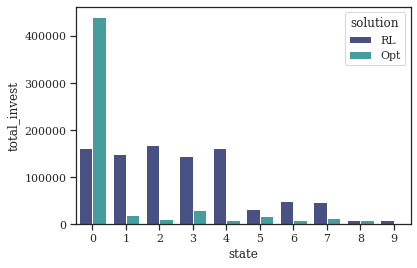

In [46]:
sns.barplot(data=decision_vars_df,x="state",y="total_invest",hue="solution",palette="mako")

<AxesSubplot:xlabel='state', ylabel='total_capital_stock'>

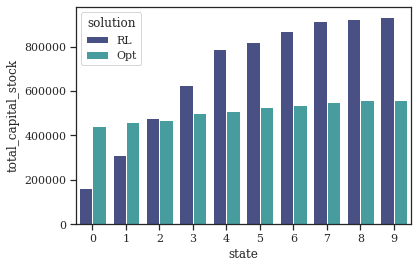

In [47]:
sns.barplot(data=decision_vars_df,x="state",y="total_capital_stock",hue="solution",palette="mako")

Maintenance Costs

In [48]:
decision_vars_df["maint_costs"] = decision_vars_df["total_capital_stock"]*maintenance_cost

In [49]:
decision_vars_df[["solution","state","maint_costs"]]

,solution,state,maint_costs
0,RL,0,8100.00
1,RL,1,15581.60
2,RL,2,24016.00
3,RL,3,31264.60
4,RL,4,39339.20
5,RL,5,40935.90
6,RL,6,43395.45
7,RL,7,45737.00
8,RL,8,46179.85
9,RL,9,46600.25


<AxesSubplot:xlabel='state', ylabel='maint_costs'>

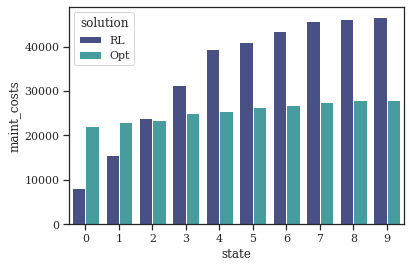

In [50]:
sns.barplot(data=decision_vars_df,x="state",y="maint_costs",hue="solution",palette="mako")

### Chargers and Connectors (Demand)

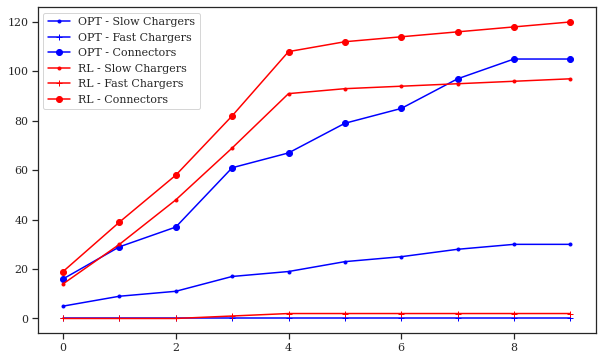

In [53]:
fig,ax=plt.subplots(figsize=(10,6))
decision_vars_df_RL = decision_vars_df[decision_vars_df["solution"]=="RL"]
decision_vars_df_OPT =  decision_vars_df[decision_vars_df["solution"]=="Opt"]

ax.plot(decision_vars_df_OPT["state"],decision_vars_df_OPT[["num_slow"]],".-",label="OPT - Slow Chargers",color="blue")
ax.plot(decision_vars_df_OPT["state"],decision_vars_df_OPT[["num_fast"]],"+-",label="OPT - Fast Chargers",color="blue")
ax.plot(decision_vars_df_OPT["state"],decision_vars_df_OPT[["num_connectors"]],"o-",label="OPT - Connectors",color="blue")

ax.plot(decision_vars_df_RL["state"],decision_vars_df_RL[["num_slow"]],".-",label="RL - Slow Chargers",color="red")#,color="red")
ax.plot(decision_vars_df_RL["state"],decision_vars_df_RL[["num_fast"]],"+-",label="RL - Fast Chargers",color="red")#,color="red")
ax.plot(decision_vars_df_RL["state"],decision_vars_df_RL[["num_connectors"]],"o-",label="RL - Connectors",color="red")


ax.legend()
plt.show()

### Trafo, Battery and PV (kW) (Supply)

In [54]:
#decision_vars_df

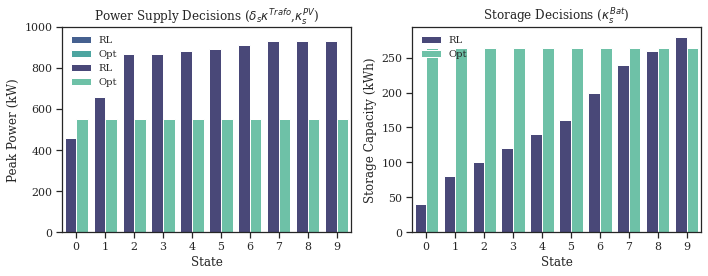

In [55]:
fig,axes=plt.subplots(nrows=1, ncols= 2, figsize=(10,4),sharex=True)
colors = sns.color_palette(palette, n_colors=9)
color_RL = colors[2]
color_RL2 = colors[3]
color_OPT = colors[-2]
color_OPT2 = colors[-3]

ax=axes[0]
sns.barplot(ax=ax,data=decision_vars_df,x="state",y="total_grid_capa",hue="solution",palette=[color_RL2,color_OPT2]) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
sns.barplot(ax=ax,data=decision_vars_df,x="state",y="total_grid+pv_capa",hue="solution",palette=[color_RL,color_OPT]) #labels=["RL-Fast Chargers","OPT-Fast Chargers"]
ax.legend(loc="upper left",frameon=False,fontsize=10)
ax.set_title("Power Supply Decisions ($\delta_s \kappa^{Trafo}$,$\kappa^{PV}_{s}$)")
ax.set_ylim((0,1000))

ax=axes[1]
sns.barplot(ax=ax,data=decision_vars_df,x="state",y="storage_capa",hue="solution",palette=[color_RL,color_OPT]) #labels=["RL-Fast Chargers","OPT-Fast Chargers"]
ax.legend(loc="upper left",frameon=False,fontsize=10)
ax.set_title("Storage Decisions ($\kappa^{Bat}_{s}$)")

#set lables
for ax in axes:
    ax.set_xlabel("State")
axes[0].set_ylabel("Peak Power (kW)")
#axes[1].set_ylabel("Cumulative Number of Fast Chargers")
axes[1].set_ylabel("Storage Capacity (kWh)")


plt.tight_layout()

### Combined

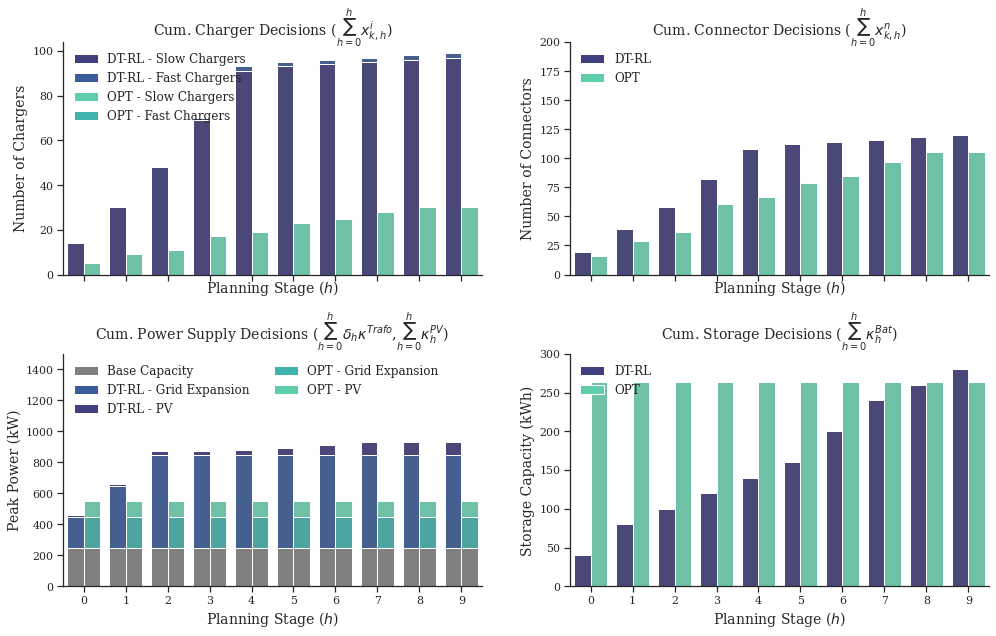

In [343]:
fig,axes=plt.subplots(nrows=2, ncols= 2, figsize=(14,9),sharex=True) #,sharey=True
colors = sns.color_palette(palette, n_colors=9)
color_RL = colors[2]
color_RL2 = colors[3]
color_OPT = colors[-2]
color_OPT2 = colors[-3]

ax=axes[0,0]
sns.barplot(ax=ax,data=decision_vars_df,x="state",y="num_chargers_total",hue="solution",palette=[color_RL2,color_OPT2]) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
sns.barplot(ax=ax,data=decision_vars_df,x="state",y="num_slow",hue="solution",palette=[color_RL,color_OPT]) #labels=["RL-Fast Chargers","OPT-Fast Chargers"]
#annotations
legend_elements = [Patch(facecolor=color_RL, edgecolor="white",label='DT-RL - Slow Chargers'),
                   Patch(facecolor=color_RL2, edgecolor="white",label='DT-RL - Fast Chargers'),
                   Patch(facecolor=color_OPT, edgecolor="white",label='OPT - Slow Chargers'),
                  Patch(facecolor=color_OPT2, edgecolor="white",label='OPT - Fast Chargers')]
ax.legend(handles=legend_elements,loc="upper left",frameon=False,fontsize=12,ncol=1)
ax.set_title("Cum. Charger Decisions ($\sum^{h}_{h=0} x^{i}_{k,h}$)",fontsize=14)
ax.set_xlabel("Planning Stage ($h$)",fontsize=14)
ax.set_ylabel("Number of Chargers",fontsize=14)
sns.despine(ax=ax,right=True, top=True)


ax=axes[0,1]
sns.barplot(ax=ax,data=decision_vars_df,x="state",y="num_connectors",hue="solution",palette=[color_RL,color_OPT])
#annotations
legend_elements = [Patch(facecolor=color_RL, edgecolor="white",label='DT-RL'),
                   Patch(facecolor=color_OPT, edgecolor="white",label='OPT')]
ax.legend(handles=legend_elements,loc="upper left",frameon=False,fontsize=12)
ax.set_title("Cum. Connector Decisions ($\sum^{h}_{h=0} x^{n}_{k,h}$)",fontsize=14)
ax.set_xlabel("Planning Stage ($h$)",fontsize=14)
ax.set_ylabel("Number of Connectors",fontsize=14)
ax.set_ylim((0,200))
sns.despine(ax=ax,right=True, top=True)

ax=axes[1,0]

sns.barplot(ax=ax,data=decision_vars_df,x="state",y="total_grid+pv_capa",hue="solution",palette=[color_RL,color_OPT]) #labels=["RL-Fast Chargers","OPT-Fast Chargers"]
sns.barplot(ax=ax,data=decision_vars_df,x="state",y="total_grid_capa",hue="solution",palette=[color_RL2,color_OPT2]) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
sns.barplot(ax=ax,data=decision_vars_df,x="state",y="base_grid_capa",hue="solution",palette=["grey","grey"]) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
ax.set_ylim((0,1500))
#annotations
legend_elements = [
    Patch(facecolor="grey", edgecolor="white",label='Base Capacity'),Patch(facecolor=color_RL2, edgecolor="white",label='DT-RL - Grid Expansion'),
                   Patch(facecolor=color_RL, edgecolor="white",label='DT-RL - PV'),
                   Patch(facecolor=color_OPT2, edgecolor="white",label='OPT - Grid Expansion'),
                  Patch(facecolor=color_OPT, edgecolor="white",label='OPT - PV')]
ax.legend(handles=legend_elements,loc="upper left",frameon=False,fontsize=12,ncol=2)
ax.set_title("Cum. Power Supply Decisions ($\sum^{h}_{h=0} \delta_h \kappa^{Trafo}$,$\sum^{h}_{h=0} \kappa^{PV}_{h}$)",fontsize=14)
ax.set_xlabel("Planning Stage ($h$)",fontsize=14)
ax.set_ylabel("Peak Power (kW)",fontsize=14)
sns.despine(ax=ax,right=True, top=True)

ax=axes[1,1]
#sns.barplot(ax=ax,data=decision_vars_df,x="state",y="supply_capa",hue="solution",palette=[color_RL2,color_OPT2]) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
sns.barplot(ax=ax,data=decision_vars_df,x="state",y="storage_capa",hue="solution",palette=[color_RL,color_OPT]) #labels=["RL-Fast Chargers","OPT-Fast Chargers"]
#annotations
legend_elements = [Patch(facecolor=color_RL, edgecolor="white",label='DT-RL'),
                   Patch(facecolor=color_OPT, edgecolor="white",label='OPT')]
ax.legend(handles=legend_elements,loc="upper left",frameon=False,fontsize=12)
ax.set_title("Cum. Storage Decisions ($\sum^{h}_{h=0} \kappa^{Bat}_{h}$)",fontsize=14)
ax.set_xlabel("Planning Stage ($h$)",fontsize=14)
ax.set_ylabel("Storage Capacity (kWh)",fontsize=14)
ax.set_ylim((0,300))
sns.despine(ax=ax,right=True, top=True)

plt.tight_layout()
plt.savefig("../visuals_output/CAPEX_decisions_benchmark.pdf")
plt.show()

# KPIS

In [364]:
kpis=pd.DataFrame()
for s in solutions:
    file = "KPIs_{}_{}.csv".format(s,fac)
    
    df = pd.read_csv(path+file)
    df["solution"] = s
    
    df["objective_penalty"] = df["objective"] - df["objective_operations"] - df["objective_investment"]
    
    df["objective"] = df["objective"]/7
    df["objective_operations"] = df["objective_operations"]/7
    df["objective_investment"] = df["objective_investment"]/7
    df["objective_penalty"] = df["objective_penalty"]/7
    
    df["state"] = np.arange(0,10,1)
    
    kpis = kpis.append(df)
    
kpis.drop(columns=["Unnamed: 0"],inplace=True)
kpis = kpis.sort_values(['state',"solution"],ascending=True)

In [366]:
#kpis[kpis["solution"]=="Opt"]

In [367]:
kpis[['objective_single', 'objective_operations_single', 'objective_investment_single','objective_penalty_single']] = kpis.groupby(['solution'])['objective', 'objective_operations', 'objective_investment','objective_penalty'].diff()
for x in ['objective', 'objective_operations', 'objective_investment','objective_penalty']:
    kpis["{}_single".format(x)] = kpis["{}_single".format(x)].fillna(kpis[x])

In [368]:
kpis

,objective,objective_operations,objective_investment,service_level,solution,objective_penalty,state,objective_single,objective_operations_single,objective_investment_single,objective_penalty_single
0,84.508685,54.154016,27.479061,0.980000,Opt,2.875609,0,84.508685,54.154016,27.479061,2.875609
0,78.813725,65.301303,11.924902,0.988333,RL,1.587520,0,78.813725,65.301303,11.924902,1.587520
1,176.000286,113.685056,53.864157,0.975833,Opt,8.451074,1,91.491601,59.531040,26.385096,5.575465
1,173.989385,135.575642,34.409560,0.990000,RL,4.004183,1,95.175659,70.274339,22.484658,2.416663
2,279.770882,180.573121,78.131820,0.964167,Opt,21.065941,2,103.770596,66.888065,24.267663,12.614867
2,288.543402,213.951709,66.243986,0.988333,RL,8.347706,2,114.554017,78.376067,31.834427,4.343524
3,405.671178,257.822419,102.671037,0.954167,Opt,45.177722,3,125.900296,77.249298,24.539217,24.111780
3,427.365599,305.245720,109.981990,0.992500,RL,12.137889,3,138.822197,91.294010,43.738004,3.790183
4,563.584598,349.567935,125.665949,0.947500,Opt,88.350714,4,157.913420,91.745516,22.994912,43.172992
4,600.587471,418.926111,164.492753,0.992500,RL,17.168607,4,173.221873,113.680391,54.510763,5.030718


get consumptions

In [369]:
#get charging load and energy
fac="Facility_KoeBogen"
compute=False
if compute==True:
    CS_util = pd.DataFrame()
    for sol in solutions:
        for s in states:
            for w in weeks:
                post_fix="_{}_state{}_week{}_{}".format(sol,s,w,fac)
                print(post_fix)
                lds = proc.get_load_curve(raw_output_save_path=path,post_fix=post_fix)
                lds["solution"] = sol
                lds["state"] = s
                lds["week"] = w

                CS_util = CS_util.append(lds)

    #requests["service_level"] = requests.apply(lambda x: 1 if x.energy_requested==0 else x.service_level,axis=1)
    CS_util.to_csv(path+"CS_combined.csv")
else:
    
    CS_util = pd.read_csv(path+"CS_combined.csv")
    
CS_util_small = CS_util[["solution","state","week","sim_time","minutes_from_midnight","minutes_from_midnight_base5","total_consumption","total_load"]]
CS_util_small.rename(columns={"total_consumption":"EV_consumption_kWh","total_load":"EV_load_kW"},inplace=True)
#CS_util_small["energy_tariff"] = CS_util_small["minutes_from_midnight"].apply(lambda x: get_elect_cost(x))
#CS_util_small["energy_cost"] = CS_util_small["energy_tariff"] * CS_util_small["total_consumption"]

In [370]:
#CS_util_small

In [371]:
# get building load
base_path="/Volumes/karsten.schroer@uni-koeln.de/Uni/Research/04_CASE_Clustered_EV_Charging/"
baseload_df = pd.DataFrame()
i=0
for w in test_weeks:
    baseload=input_proc.get_sim_baseload_curve(base_path=base_path, cache_path=base_path, 
                                               facility="K1+K2", sim_start_day=w, num_lookback_periods=0,
                           sim_duration=7,min_facility_baseload=74, max_facility_baseload=220)
    baseload["week"] = i
    i+=1
    baseload.reset_index(inplace=True)
    baseload.drop(columns=["time"],inplace=True)
    
    baseload_df=baseload_df.append(baseload)    
    
baseload_df.rename(columns={"load_kw_rescaled":"building_load_kw"},inplace=True)
#get consumption
baseload_df["building_consumption_kWh"] = baseload_df["building_load_kw"]/60
#get load by week
#baseload_df_weekly = baseload_df[["week","building_consumption_kwh"]].groupby("week").sum()
#baseload_df_weekly.reset_index(inplace=True)

In [372]:
#merge building consumption
CS_util_small = CS_util_small.merge(baseload_df,how="left",on=["week","sim_time"])

In [373]:
consumption = CS_util_small[["state","solution","EV_consumption_kWh","building_consumption_kWh"]].groupby(["solution","state"]).sum()
consumption.reset_index(inplace=True)
consumption["EV_consumption_kWh_daily"] = consumption["EV_consumption_kWh"]/7/12 #divide by 12 weeks and 7 days per week
consumption["building_consumption_kWh_daily"] = consumption["building_consumption_kWh"]/7/12 #divide by 12 weeks and 7 days per week
consumption["consumption_kWh_daily"] = consumption["EV_consumption_kWh_daily"] + consumption["building_consumption_kWh_daily"]

In [374]:
kpis_combined = kpis.merge(consumption,how="left",on=["state","solution"])
kpis_combined["specific_objective_operations_daily"] =kpis_combined["objective_operations_single"] / kpis_combined["EV_consumption_kWh_daily"]
kpis_combined["specific_objective_investment_daily"] =kpis_combined["objective_investment_single"] / kpis_combined["EV_consumption_kWh_daily"]
kpis_combined["specific_objective_penalty_daily"] =kpis_combined["objective_penalty_single"] / kpis_combined["EV_consumption_kWh_daily"]

In [375]:
kpis_combined

,objective,objective_operations,objective_investment,service_level,solution,objective_penalty,state,objective_single,objective_operations_single,objective_investment_single,objective_penalty_single,EV_consumption_kWh,building_consumption_kWh,EV_consumption_kWh_daily,building_consumption_kWh_daily,consumption_kWh_daily,specific_objective_operations_daily,specific_objective_investment_daily,specific_objective_penalty_daily
0,84.508685,54.154016,27.479061,0.980000,Opt,2.875609,0,84.508685,54.154016,27.479061,2.875609,23521.628628,288793.535179,280.019388,3438.018276,3718.037664,0.193394,0.098133,0.010269
1,78.813725,65.301303,11.924902,0.988333,RL,1.587520,0,78.813725,65.301303,11.924902,1.587520,23730.669615,288793.535179,282.507972,3438.018276,3720.526248,0.231149,0.042211,0.005619
2,176.000286,113.685056,53.864157,0.975833,Opt,8.451074,1,91.491601,59.531040,26.385096,5.575465,37795.536262,288793.535179,449.946860,3438.018276,3887.965136,0.132307,0.058640,0.012391
3,173.989385,135.575642,34.409560,0.990000,RL,4.004183,1,95.175659,70.274339,22.484658,2.416663,38302.137359,288793.535179,455.977826,3438.018276,3893.996102,0.154118,0.049311,0.005300
4,279.770882,180.573121,78.131820,0.964167,Opt,21.065941,2,103.770596,66.888065,24.267663,12.614867,56271.156730,288793.535179,669.894723,3438.018276,4107.912999,0.099849,0.036226,0.018831
5,288.543402,213.951709,66.243986,0.988333,RL,8.347706,2,114.554017,78.376067,31.834427,4.343524,57598.092048,288793.535179,685.691572,3438.018276,4123.709848,0.114302,0.046427,0.006335
6,405.671178,257.822419,102.671037,0.954167,Opt,45.177722,3,125.900296,77.249298,24.539217,24.111780,84082.831968,288793.535179,1000.986095,3438.018276,4439.004371,0.077173,0.024515,0.024088
7,427.365599,305.245720,109.981990,0.992500,RL,12.137889,3,138.822197,91.294010,43.738004,3.790183,87336.711504,288793.535179,1039.722756,3438.018276,4477.741032,0.087806,0.042067,0.003645
8,563.584598,349.567935,125.665949,0.947500,Opt,88.350714,4,157.913420,91.745516,22.994912,43.172992,126582.963214,288793.535179,1506.940038,3438.018276,4944.958314,0.060882,0.015259,0.028649
9,600.587471,418.926111,164.492753,0.992500,RL,17.168607,4,173.221873,113.680391,54.510763,5.030718,132732.546522,288793.535179,1580.149363,3438.018276,5018.167639,0.071943,0.034497,0.003184


Energy Delivered and Service Level

In [376]:
#kpis_combined

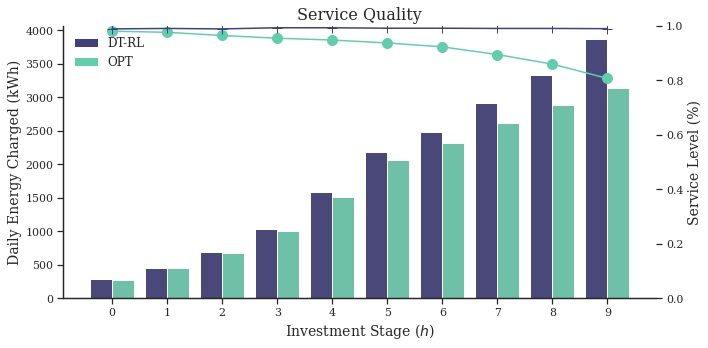

In [377]:
set_plotting_style()
#sns.set_palette(sns.color_palette(get_colors()))
sns.set_palette(sns.color_palette("mako"))

order = ["RL","Opt"]

colors = sns.color_palette(palette, n_colors=9)
color_RL = colors[2]
color_RL2 = colors[3]
color_OPT = colors[-2]
color_OPT2 = colors[-3]

# plot it
fig, ax0 = plt.subplots(figsize=(10, 5))  # 7:4 ratio


##### UPPER PLOT
#energy_grouped["EV_consumption_MWh_full"] = energy_grouped["EV_consumption_MWh"]*2

sns.barplot(x="state",y="EV_consumption_kWh_daily",hue="solution",data=kpis_combined,ax=ax0,hue_order=order,palette=[color_RL,color_OPT])

ax0.set_title("Service Quality",fontsize=16)
ax0.set_xlabel("Investment Stage ($h$)",fontsize=14)
ax0.set_ylabel("Daily Energy Charged (kWh)",fontsize=14)
legend_elements = [Patch(facecolor=color_RL, edgecolor="white",label='DT-RL'),
                   Patch(facecolor=color_OPT, edgecolor="white",label='OPT')]
ax0.legend(handles=legend_elements,loc="upper left",frameon=False,fontsize=12,ncol=1)
#ax0.set_ylim(0,5000)

###### LOWER PLOT

ax1 = ax0.twinx()

ax1.plot(kpis_combined[kpis_combined["solution"]=="Opt"]["state"],
         kpis_combined[kpis_combined["solution"]=="Opt"]["service_level"],"o-",color=color_OPT,markersize="10")

ax1.plot(kpis_combined[kpis_combined["solution"]==order[0]]["state"],
         kpis_combined[kpis_combined["solution"]==order[0]]["service_level"],"+-",color=color_RL,markersize="10")

ax1.set_ylabel("Service Level (%)", fontsize=14)
ax1.set_ylim(0,1)
    
sns.despine(ax=ax0, left=False, bottom=False)
sns.despine(ax=ax1)

plt.tight_layout()
plt.savefig("../visuals_output/service_quality_benchmark.pdf")
plt.show()

Objective

In [378]:
#tranform

kpis_combined_trafo = pd.DataFrame()

for s in solutions:
    for state in np.arange(0,10,1):
        for kpi in ['specific_objective_investment_daily','specific_objective_operations_daily', 'specific_objective_penalty_daily']:
            df_sub = kpis_combined[(kpis_combined["solution"]==s)&(kpis_combined["state"]==state)][["solution","state",kpi]]
            df_sub.head()
            df_sub.columns=["solution","state","value"]
            df_sub["kpi"] = kpi
            
            kpis_combined_trafo = kpis_combined_trafo.append(df_sub)
        

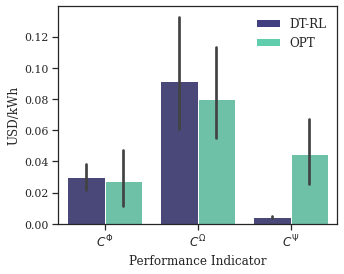

In [379]:
#gridspec_kw={'width_ratios': [3, 1]}
fig,ax = plt.subplots(figsize=(5,4))
colors = sns.color_palette(palette, n_colors=9)
color_RL = colors[2]
color_RL2 = colors[3]
color_OPT = colors[-2]
color_OPT2 = colors[-3]

#sns.barplot(ax=ax,data=yearly_profit,x="state",y="EV_GrossProfit_Costs_USD",hue="solution",
#            hue_order=["RL_[64,64]_high_learning_iterations","Opt"],palette=[color_RL,color_OPT])
sns.barplot(ax=ax,data=kpis_combined_trafo[kpis_combined_trafo["kpi"].isin(['specific_objective_operations_daily', 'specific_objective_investment_daily','specific_objective_penalty_daily'])],x="kpi",y="value",
            hue="solution",
            hue_order=["RL","Opt"],palette=[color_RL,color_OPT]),
           #order=["EV_Revenue_USD_full","EV_Ops_Costs_USD_full","EV_Deprec_Costs_USD_full","EV_GrossProfit_USD_full"])

ax.set_ylabel("USD/kWh")
ax.set_xlabel("Performance Indicator")
ax.set_xticklabels(['$C^{\Phi}$', '$C^{\Omega}$', '$C^{\Psi}$'],fontsize=12)

legend_elements = [Patch(facecolor=color_RL, edgecolor="white",label='DT-RL'),
                   Patch(facecolor=color_OPT, edgecolor="white",label='OPT')]
ax.legend(handles=legend_elements,loc="upper right",frameon=False,fontsize=12,ncol=1)

plt.show()

Combined Plot

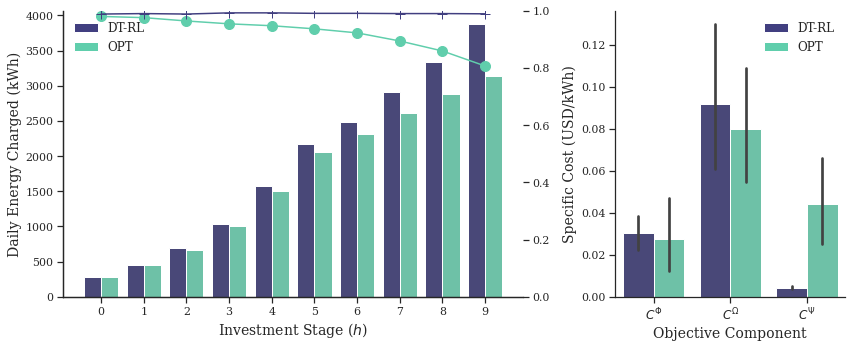

In [382]:
#gridspec_kw={'width_ratios': [3, 1]}
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5), gridspec_kw={'width_ratios': [2, 1]})
colors = sns.color_palette(palette, n_colors=9)
color_RL = colors[2]
color_RL2 = colors[3]
color_OPT = colors[-2]
color_OPT2 = colors[-3]

ax0=axes[0]

##### UPPER PLOT
#energy_grouped["EV_consumption_MWh_full"] = energy_grouped["EV_consumption_MWh"]*2

sns.barplot(x="state",y="EV_consumption_kWh_daily",hue="solution",data=kpis_combined,ax=ax0,hue_order=order,palette=[color_RL,color_OPT])

#ax0.set_title("Service Quality",fontsize=16)
ax0.set_xlabel("Investment Stage ($h$)",fontsize=14)
ax0.set_ylabel("Daily Energy Charged (kWh)",fontsize=14)
legend_elements = [Patch(facecolor=color_RL, edgecolor="white",label='DT-RL'),
                   Patch(facecolor=color_OPT, edgecolor="white",label='OPT')]
ax0.legend(handles=legend_elements,loc="upper left",frameon=False,fontsize=12,ncol=1)
#ax0.set_ylim(0,5000)

###### LOWER PLOT

ax1 = ax0.twinx()

ax1.plot(kpis_combined[kpis_combined["solution"]=="Opt"]["state"],
         kpis_combined[kpis_combined["solution"]=="Opt"]["service_level"],"o-",color=color_OPT,markersize="10")

ax1.plot(kpis_combined[kpis_combined["solution"]==order[0]]["state"],
         kpis_combined[kpis_combined["solution"]==order[0]]["service_level"],"+-",color=color_RL,markersize="10")

#ax1.set_ylabel("Service Level (%)", fontsize=14)
ax1.set_ylim(0,1)
    
sns.despine(ax=ax0, left=False, bottom=False)
sns.despine(ax=ax1)


#PLOT 2

ax=axes[1]
sns.barplot(ax=axes[1],data=kpis_combined_trafo[kpis_combined_trafo["kpi"].isin(['specific_objective_operations_daily', 'specific_objective_investment_daily','specific_objective_penalty_daily'])],x="kpi",y="value",
            hue="solution",
            hue_order=["RL","Opt"],palette=[color_RL,color_OPT])
           #order=["EV_Revenue_USD_full","EV_Ops_Costs_USD_full","EV_Deprec_Costs_USD_full","EV_GrossProfit_USD_full"])

ax.set_ylabel("Specific Cost (USD/kWh)",fontsize=14)
ax.set_xlabel("Objective Component",fontsize=14)
ax.set_xticklabels(['$C^{\Phi}$', '$C^{\Omega}$', '$C^{\Psi}$'],fontsize=12)

legend_elements = [Patch(facecolor=color_RL, edgecolor="white",label='DT-RL'),
                   Patch(facecolor=color_OPT, edgecolor="white",label='OPT')]
ax.legend(handles=legend_elements,loc="upper right",frameon=False,fontsize=12,ncol=1)

sns.despine(ax=ax, left=False, bottom=False)

plt.tight_layout()
plt.savefig("../visuals_output/KPI_benchmark.pdf")
plt.show()

# Operational Performance (LEGACY CODE!!!)

Depreciation Costs

(this is done externally for now)

In [52]:
#done in excel for now...
#deprec_costs = pd.read_excel("/Volumes/karsten.schroer@uni-koeln.de/Uni/raw_output/raw_output/deprec_costs_static6.xlsx")#done in excel for now...
#deprec_costs = deprec_costs.transpose()
#deprec_costs.columns=deprec_costs.iloc[0]

#deprec_costs = deprec_costs[deprec_costs["solution"].isin(["RL","OPT"])==True]
#deprec_costs.reset_index(inplace=True)

#deprec_costs["state"] = np.array([0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9])
#deprec_costs["solution"] = deprec_costs["solution"].apply(lambda x: "Opt" if x=="OPT" else x)
#deprec_costs[["solution","state",'total_yearly_deprec','total_daily_deprec']]

In [18]:
def get_elect_cost(x):
    """
    #hourly_energy_costs = 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 23, 23, 23, 23, 23, 23, 8, 8
    """
    if x < 16*60:
        out=0.08
    elif x>=16*60 and x<22*60:
        out=0.23
    else:
        out=0.08
    return out

In [19]:
#requests
fac="Facility_KoeBogen"
compute=True
if compute==True:
    requests = pd.DataFrame()
    for sol in solutions:
        for s in states:
            for w in weeks:
                post_fix="_{}_state{}_week{}_{}".format(sol,s,w,fac)
                #print(post_fix)
                reqs = proc.get_requests(raw_output_save_path=path,post_fix=post_fix)
                reqs["solution"] = sol
                reqs["state"] = s
                reqs["week"] = w

                requests = requests.append(reqs)

    requests["service_level"] = requests.apply(lambda x: 1 if x.energy_requested==0 else x.service_level,axis=1)
    requests.to_csv(path+"requests_combined.csv")
    
else:
    requests = pd.read_csv(path+"requests_combined.csv")

In [20]:
#requests

In [62]:
#get charging load and energy
fac="Facility_KoeBogen"
compute=False
if compute==True:
    CS_util = pd.DataFrame()
    for sol in solutions:
        for s in states:
            for w in weeks:
                post_fix="_{}_state{}_week{}_{}".format(sol,s,w,fac)
                print(post_fix)
                lds = proc.get_load_curve(raw_output_save_path=path,post_fix=post_fix)
                lds["solution"] = sol
                lds["state"] = s
                lds["week"] = w

                CS_util = CS_util.append(lds)

    #requests["service_level"] = requests.apply(lambda x: 1 if x.energy_requested==0 else x.service_level,axis=1)
    CS_util.to_csv(path+"CS_combined.csv")
else:
    
    CS_util = pd.read_csv(path+"CS_combined.csv")
    
CS_util_small = CS_util[["solution","state","week","sim_time","minutes_from_midnight","minutes_from_midnight_base5","total_consumption","total_load"]]
CS_util_small.rename(columns={"total_consumption":"EV_consumption_kWh","total_load":"EV_load_kW"},inplace=True)
#CS_util_small["energy_tariff"] = CS_util_small["minutes_from_midnight"].apply(lambda x: get_elect_cost(x))
#CS_util_small["energy_cost"] = CS_util_small["energy_tariff"] * CS_util_small["total_consumption"]

In [65]:
CS_util_small

,solution,state,week,sim_time,minutes_from_midnight,minutes_from_midnight_base5,EV_consumption_kWh,EV_load_kW
0,RL,0,0,0,0,0,0.0,0.0
1,RL,0,0,1,1,0,0.0,0.0
2,RL,0,0,2,2,0,0.0,0.0
3,RL,0,0,3,3,0,0.0,0.0
4,RL,0,0,4,4,0,0.0,0.0
...,...,...,...,...,...,...,...,...
2419195,Opt,9,11,10075,1435,1435,0.0,0.0
2419196,Opt,9,11,10076,1436,1435,0.0,0.0
2419197,Opt,9,11,10077,1437,1435,0.0,0.0
2419198,Opt,9,11,10078,1438,1435,0.0,0.0


In [22]:
print(len(CS_util_small),10*12*7*24*60*2)

2419200 2419200


In [23]:
#get_storage_load and energy
fac="Facility_KoeBogen"
compute=True
if compute==True:
    storage_load = pd.DataFrame()
    for sol in solutions:
        for s in states:
            for w in weeks:
                post_fix="_{}_state{}_week{}_{}".format(sol,s,w,fac)
                
                strg_lds = proc.get_storage_load(raw_output_save_path=path,post_fix=post_fix)
                strg_lds["solution"] = sol
                strg_lds["state"] = s
                strg_lds["week"] = w
                print(post_fix,len(strg_lds))
                storage_load = storage_load.append(strg_lds)

    #requests["service_level"] = requests.apply(lambda x: 1 if x.energy_requested==0 else x.service_level,axis=1)
    storage_load.to_csv(path+"storage_combined.csv")
else:
    storage_load=pd.read_csv(path+"storage_combined.csv")

storage_load_small = storage_load[["solution","state","week","sim_time","minutes_from_midnight","minutes_from_midnight_base5","charge_load","discharge_load"]]
storage_load_small.rename(columns={"charge_load":"battery_charge_load_kW","discharge_load":"battery_discharge_load_kW"},inplace=True)

storage_load_small["battery_energy_supply_kWh"] = storage_load_small["battery_discharge_load_kW"]/60
storage_load_small["battery_energy_demand_kWh"] = storage_load_small["battery_charge_load_kW"]/60

_RL_state0_week0_Facility_KoeBogen 10080
_RL_state0_week1_Facility_KoeBogen 10080
_RL_state0_week2_Facility_KoeBogen 10080
_RL_state0_week3_Facility_KoeBogen 10080
_RL_state0_week4_Facility_KoeBogen 10080
_RL_state0_week5_Facility_KoeBogen 10080
_RL_state0_week6_Facility_KoeBogen 10080
_RL_state0_week7_Facility_KoeBogen 10080
_RL_state0_week8_Facility_KoeBogen 10080
_RL_state0_week9_Facility_KoeBogen 10080
_RL_state0_week10_Facility_KoeBogen 10080
_RL_state0_week11_Facility_KoeBogen 10080
_RL_state1_week0_Facility_KoeBogen 10080
_RL_state1_week1_Facility_KoeBogen 10080
_RL_state1_week2_Facility_KoeBogen 10080
_RL_state1_week3_Facility_KoeBogen 10080
_RL_state1_week4_Facility_KoeBogen 10080
_RL_state1_week5_Facility_KoeBogen 10080
_RL_state1_week6_Facility_KoeBogen 10080
_RL_state1_week7_Facility_KoeBogen 10080
_RL_state1_week8_Facility_KoeBogen 10080
_RL_state1_week9_Facility_KoeBogen 10080
_RL_state1_week10_Facility_KoeBogen 10080
_RL_state1_week11_Facility_KoeBogen 10080
_RL_state2_w

In [24]:
print(len(storage_load_small),10*12*7*24*60*2)

2419200 2419200


In [25]:
# get PV load
base_path="/Volumes/karsten.schroer@uni-koeln.de/Uni/Research/04_CASE_Clustered_EV_Charging/"
pv_load_factors = pd.DataFrame()
i=0
for w in test_weeks:
    pv=input_proc.get_sim_PV_load_factors(base_path=base_path, cache_path=base_path, sim_start_day=w,
                                num_lookback_periods=0, sim_duration=7, time_col="time",
                                load_factor_col="DE_pv_national_current",
                                pv_data_resolution="hour")
    pv["week"] = i
    i+=1
    pv.reset_index(inplace=True)
    pv.drop(columns=["time","day","hour"],inplace=True)
    
    pv_load_factors=pv_load_factors.append(pv)    

In [26]:
#pv_load_factors

In [27]:
# get building load
base_path="/Volumes/karsten.schroer@uni-koeln.de/Uni/Research/04_CASE_Clustered_EV_Charging/"
baseload_df = pd.DataFrame()
i=0
for w in test_weeks:
    baseload=input_proc.get_sim_baseload_curve(base_path=base_path, cache_path=base_path, 
                                               facility="K1+K2", sim_start_day=w, num_lookback_periods=0,
                           sim_duration=7,min_facility_baseload=74, max_facility_baseload=220)
    baseload["week"] = i
    i+=1
    baseload.reset_index(inplace=True)
    baseload.drop(columns=["time"],inplace=True)
    
    baseload_df=baseload_df.append(baseload)    
    
baseload_df.rename(columns={"load_kw_rescaled":"building_load_kw"},inplace=True)

In [28]:
#baseload_df

In [29]:
#merge all into single df
loads_df = CS_util_small.copy()
loads_df = loads_df.merge(storage_load_small[['solution', 'state', 'week', 'sim_time','battery_charge_load_kW',
       'battery_discharge_load_kW', 'battery_energy_supply_kWh',
       'battery_energy_demand_kWh']],how="left",on=['solution', 'state', 'week', 'sim_time'])
loads_df=loads_df.merge(baseload_df,how="left",on=["week","sim_time"])
loads_df=loads_df.merge(pv_load_factors,how="left",on=["week","sim_time"])
loads_df=loads_df.merge(decision_vars_df[["pv_capa","state","solution"]],on=["state","solution"],how="left")

#calc remaining loads
loads_df["pv_load_kw"] = loads_df["pv_load_factor"]*loads_df["pv_capa"]
loads_df["total_load_kw"] = loads_df["EV_load_kW"] + loads_df["building_load_kw"] + loads_df["battery_charge_load_kW"]
loads_df["grid_load_kw"] = loads_df["total_load_kw"] - loads_df["pv_load_kw"] - loads_df["battery_discharge_load_kW"]
loads_df["grid_energy_kwh"] = loads_df["grid_load_kw"]/60
loads_df["total_energy_kwh"] = loads_df["total_load_kw"]/60
loads_df["total_energy_delivered_kwh"] = (loads_df["EV_load_kW"]+loads_df["building_load_kw"])/60

loads_df["electricity_tariff"] = loads_df["minutes_from_midnight"].apply(lambda x: get_elect_cost(x))
loads_df["weighted_electricity_cost"] = (loads_df["grid_energy_kwh"]*loads_df["electricity_tariff"])/loads_df["total_energy_kwh"]
loads_df["electricity_cost"] = loads_df["electricity_tariff"] * loads_df["grid_energy_kwh"]
loads_df["charging_cost"] = loads_df["EV_consumption_kWh"] * loads_df["weighted_electricity_cost"]

#get max loads
max_loads = loads_df.groupby(["state","solution","week"]).agg({"grid_load_kw":"max","building_load_kw":"max"})
max_loads["max_load_yn"] = 1
max_loads["max_load_attributable_EV_new"] = max_loads["grid_load_kw"] - max_loads["building_load_kw"]
max_loads.reset_index(inplace=True)

loads_df = loads_df.merge(max_loads[["state","solution","week","max_load_attributable_EV_new"]],on=["state","solution","week"],how="left")

In [30]:
loads_df

In [31]:
#energy_grouped = loads_df.groupby(["state","solution"]).agg({"EV_load_kW":"sum","building_load_kw":"sum","pv_load_kw":"sum","total_energy_delivered_kwh":"sum","electricity_cost":"sum","charging_cost":"sum"})
energy_grouped = loads_df.groupby(["state","solution"]).agg({"weighted_electricity_cost":"mean","EV_consumption_kWh":"sum","charging_cost":"sum"})
energy_grouped.reset_index(inplace=True)
energy_grouped["EV_consumption_MWh"] = energy_grouped["EV_consumption_kWh"]/1000
#energy_grouped["rel_cost"] = energy_grouped["electricity_cost"]/energy_grouped["EV_consumption_MWh"]

#requests_grouped = requests.groupby(["state","solution"]).agg({"service_level":"mean"})
#requests_grouped.reset_index(inplace=True)

power_grouped = loads_df.groupby(["state","solution","week"]).agg({"max_load_attributable_EV_new":"max"})
power_grouped["peak_cost"] = power_grouped["max_load_attributable_EV_new"]*15.84/4.34524 #4,34524 in a month, it is a monthly cost
power_grouped=power_grouped.groupby(["state","solution"]).agg({"max_load_attributable_EV_new":"max","peak_cost":"sum"})
power_grouped.reset_index(inplace=True)

#add maintenance

ops_costs=energy_grouped.merge(power_grouped,how="left",on=["state","solution"])

ops_costs=ops_costs.merge(decision_vars_df[["solution","state","maint_costs"]],how="left",on=["state","solution"])

ops_costs["total_costs"] = ops_costs["peak_cost"]+ops_costs["charging_cost"]+ops_costs["maint_costs"]
ops_costs["rel_costs"] = ops_costs["total_costs"]/ops_costs["EV_consumption_kWh"]

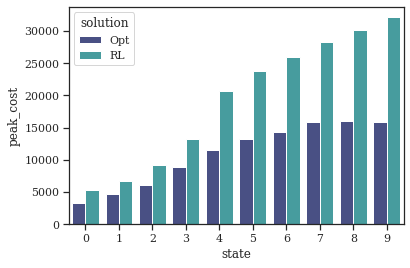

In [32]:
sns.barplot(data=ops_costs,x="state",y="peak_cost",hue="solution",palette="mako")
plt.show()

In [130]:
yearly_profit = ops_costs.copy()
yearly_profit = yearly_profit.merge(deprec_costs[["state","solution","total_yearly_deprec","total_daily_deprec"]],on=["state","solution"],how="left")

In [131]:
yearly_profit["EV_consumption_year_kWh"] = yearly_profit["EV_consumption_kWh"]/12*52
yearly_profit["EV_Revenue_USD"] = yearly_profit["EV_consumption_kWh"]*0.5
yearly_profit["EV_Elec_Costs_USD"] = yearly_profit["charging_cost"]/12*52
yearly_profit["EV_Demand_Costs_USD"] = yearly_profit["peak_cost"]/12*52
yearly_profit["EV_Ops_Costs_USD"] = yearly_profit["EV_consumption_kWh"]*yearly_profit["rel_costs"]
yearly_profit["total_yearly_deprec"] = yearly_profit["total_yearly_deprec"].apply(lambda x: float(x))
yearly_profit["total_daily_deprec"] = yearly_profit["total_daily_deprec"].apply(lambda x: float(x))
yearly_profit["EV_Deprec_Costs_USD"] = yearly_profit["total_daily_deprec"]*12*7
yearly_profit["EV_VarProfit_USD"] = yearly_profit["EV_Revenue_USD"]-yearly_profit["EV_Ops_Costs_USD"]
yearly_profit["EV_GrossProfit_USD"] = yearly_profit["EV_Revenue_USD"]-yearly_profit["EV_Ops_Costs_USD"]-yearly_profit["EV_Deprec_Costs_USD"]

In [132]:
yearly_profit

,state,solution,weighted_electricity_cost,EV_consumption_kWh,charging_cost,EV_consumption_MWh,max_load_attributable_EV_new,peak_cost,maint_costs,total_costs,...,total_yearly_deprec,total_daily_deprec,EV_consumption_year_kWh,EV_Revenue_USD,EV_Elec_Costs_USD,EV_Demand_Costs_USD,EV_Ops_Costs_USD,EV_Deprec_Costs_USD,EV_VarProfit_USD,EV_GrossProfit_USD
0,0,Opt,0.097907,23521.628628,2495.461947,23.521629,115.203386,3284.803736,22011.25,27791.515683,...,42745.833333,117.111872,1.019271e+05,11760.814314,10813.668436,14234.149524,27791.515683,9837.397260,-16030.701369,-25868.098629
1,0,RL,0.114764,23730.669615,2994.490967,23.730670,146.240014,5260.759527,8100.00,16355.250494,...,18687.500000,51.198630,1.028329e+05,11865.334808,12976.127524,22796.624615,16355.250494,4300.684932,-4489.915686,-8790.600617
2,1,Opt,0.098789,37795.536262,4101.703094,37.795536,156.979517,4644.564941,23038.15,31784.418035,...,46168.833333,126.489954,1.637807e+05,18897.768131,17774.046740,20126.448080,31784.418035,10625.156164,-12886.649905,-23511.806069
3,1,RL,0.112818,38302.137359,4791.676232,38.302137,201.134731,6712.434045,15581.60,27085.710277,...,37186.166667,101.879909,1.659759e+05,19151.068680,20763.930340,29087.214195,27085.710277,8557.912329,-7934.641598,-16492.553927
4,2,Opt,0.099800,56271.156730,6269.518152,56.271157,179.827916,6147.655555,23553.25,35970.423707,...,47885.833333,131.194064,2.438417e+05,28135.578365,27167.911992,26639.840737,35970.423707,11020.301370,-7834.845342,-18855.146711
5,2,RL,0.111567,57598.092048,7176.879116,57.598092,330.201273,9222.127394,24016.00,40415.006511,...,55920.833333,153.207763,2.495917e+05,28799.046024,31099.809504,39962.552042,40415.006511,12869.452055,-11615.960486,-24485.412541
6,3,Opt,0.101075,84082.831968,9601.844535,84.082832,258.669623,8820.381173,25049.05,43471.275708,...,23251.000000,63.701370,3.643589e+05,42041.415984,41607.992985,38221.651750,43471.275708,5350.915068,-1429.859724,-6780.774792
7,3,RL,0.111065,87336.711504,10865.397536,87.336712,408.551213,13179.885926,31264.60,55309.883462,...,64957.833333,177.966667,3.784591e+05,43668.355752,47083.389323,57112.839011,55309.883462,14949.200000,-11641.527710,-26590.727710
8,4,Opt,0.102651,126582.963214,14917.159052,126.582963,307.266653,11458.849042,25506.85,51882.858094,...,21354.000000,58.504110,5.485262e+05,63291.481607,64641.022559,49655.012514,51882.858094,4914.345205,11408.623513,6494.278308
9,4,RL,0.110405,132732.546522,16517.766371,132.732547,661.491312,20606.524224,39339.20,76463.490595,...,71078.666667,194.736073,5.751744e+05,66366.273261,71576.987606,89294.938305,76463.490595,16357.830137,-10097.217334,-26455.047471


In [108]:
yearly_profit_grouped = yearly_profit.groupby("solution").sum()#[["EV_consumption_year_kWh","EV_Ops_Costs_USD","EV_Deprec_Costs_USD","EV_Revenue_USD","EV_GrossProfit_USD"]]

for col in yearly_profit_grouped.columns:
    if col in ["EV_Ops_Costs_USD","EV_Deprec_Costs_USD"]:
        yearly_profit_grouped[col] = yearly_profit_grouped[col]*-1
    
    yearly_profit_grouped["{}_full".format(col)]=yearly_profit_grouped[col]*2
    
yearly_profit_grouped.reset_index(inplace=True)

profit_plot_data = yearly_profit_grouped.pivot(columns="solution").transpose().reset_index()
profit_plot_data.columns=["KPI","solution","value","value_2"]
profit_plot_data["value"] = profit_plot_data["value"].fillna(profit_plot_data["value_2"])
profit_plot_data = profit_plot_data[profit_plot_data["KPI"].isin(["index"])==False][['KPI', 'solution', 'value']]

In [123]:
profit_plot_data

,KPI,solution,value
0,state,Opt,4.500000e+01
1,state,RL,4.500000e+01
2,weighted_electricity_cost,Opt,1.041645e+00
3,weighted_electricity_cost,RL,1.105722e+00
4,EV_consumption_kWh,Opt,1.420319e+06
...,...,...,...
71,EV_Deprec_Costs_USD_full,RL,-1.854442e+05
72,EV_VarProfit_USD_full,Opt,8.508043e+05
73,EV_VarProfit_USD_full,RL,7.961144e+05
74,EV_GrossProfit_USD_full,Opt,7.231114e+05


<AxesSubplot:xlabel='KPI', ylabel='value'>

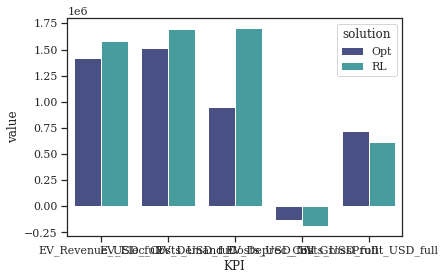

In [133]:
sns.barplot(data=profit_plot_data[profit_plot_data["KPI"].isin(["EV_Revenue_USD_full","EV_Elec_Costs_USD_full","EV_Demand_Costs_USD_full","EV_Deprec_Costs_USD_full","EV_GrossProfit_USD_full"])],x="KPI",y="value",hue="solution",palette="mako")

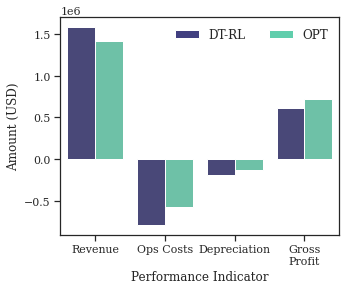

In [134]:
#gridspec_kw={'width_ratios': [3, 1]}
fig,ax = plt.subplots(figsize=(5,4))
colors = sns.color_palette(palette, n_colors=9)
color_RL = colors[2]
color_RL2 = colors[3]
color_OPT = colors[-2]
color_OPT2 = colors[-3]

#sns.barplot(ax=ax,data=yearly_profit,x="state",y="EV_GrossProfit_Costs_USD",hue="solution",
#            hue_order=["RL_[64,64]_high_learning_iterations","Opt"],palette=[color_RL,color_OPT])
sns.barplot(ax=ax,data=profit_plot_data[profit_plot_data["KPI"].isin(["EV_Revenue_USD_full","EV_Ops_Costs_USD_full","EV_Deprec_Costs_USD_full","EV_GrossProfit_USD_full"])],x="KPI",y="value",
            hue="solution",
            hue_order=["RL","Opt"],palette=[color_RL,color_OPT],
           order=["EV_Revenue_USD_full","EV_Ops_Costs_USD_full","EV_Deprec_Costs_USD_full","EV_GrossProfit_USD_full"])

ax.set_ylabel("Amount (USD)")
ax.set_xlabel("Performance Indicator")
ax.set_xticklabels(['Revenue', 'Ops Costs', 'Depreciation', 'Gross\nProfit'])

legend_elements = [Patch(facecolor=color_RL, edgecolor="white",label='DT-RL'),
                   Patch(facecolor=color_OPT, edgecolor="white",label='OPT')]
ax.legend(handles=legend_elements,loc="upper right",frameon=False,fontsize=12,ncol=2)

plt.show()

In [135]:
profit_plot_data

,KPI,solution,value
0,state,Opt,4.500000e+01
1,state,RL,4.500000e+01
2,weighted_electricity_cost,Opt,1.041645e+00
3,weighted_electricity_cost,RL,1.105722e+00
4,EV_consumption_kWh,Opt,1.420319e+06
...,...,...,...
71,EV_Deprec_Costs_USD_full,RL,-1.854442e+05
72,EV_VarProfit_USD_full,Opt,8.508043e+05
73,EV_VarProfit_USD_full,RL,7.961144e+05
74,EV_GrossProfit_USD_full,Opt,7.231114e+05


### Service Quality

In [136]:
requests.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'facility', 'vehicle_id', 'ev_yn',
       'user_type', 'arrival_time', 'arrival_period', 'departure_time',
       'departure_period', 'assigned_charger', 'assigned_parking',
       'stop_charging_time', 'energy_requested', 'energy_charged', 'day',
       'day_of_week', 'weekday_yn', 'park_duration_min', 'arrival_hour',
       'departure_hour', 'park_duration_h', 'full_speed_charge_duration',
       'laxity', 'service_level', 'solution', 'state', 'week'],
      dtype='object')

In [137]:
#requests_grouped = requests[requests["service_level"]>=0].groupby(["state","solution"]).agg({"service_level":"mean"})
requests_grouped = requests[requests["energy_charged"]>=0].groupby(["state","solution"]).agg({"energy_requested":"sum","energy_charged":"sum"})
requests_grouped["service_level"] = requests_grouped["energy_charged"]/requests_grouped["energy_requested"]
requests_grouped.reset_index(inplace=True)

In [138]:
requests_grouped

,state,solution,energy_requested,energy_charged,service_level
0,0,Opt,24163.148159,23680.045826,0.980007
1,0,RL,24163.148159,23896.444826,0.988962
2,1,Opt,38987.807237,38058.869159,0.976174
3,1,RL,38995.547237,38589.547903,0.989589
4,2,Opt,58741.003876,56669.036151,0.964727
5,2,RL,58788.333876,58058.621876,0.987587
6,3,Opt,88656.247315,84687.888229,0.955239
7,3,RL,88738.667315,88101.916649,0.992824
8,4,Opt,134655.898722,127486.046048,0.946754
9,4,RL,134739.108722,133893.948055,0.993727


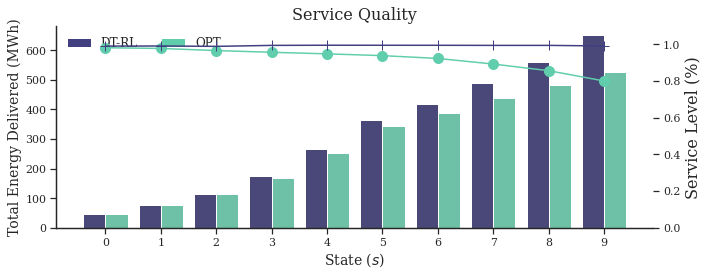

In [139]:
set_plotting_style()
#sns.set_palette(sns.color_palette(get_colors()))
sns.set_palette(sns.color_palette("mako"))

order = ["RL","Opt"]

colors = sns.color_palette(palette, n_colors=9)
color_RL = colors[2]
color_RL2 = colors[3]
color_OPT = colors[-2]
color_OPT2 = colors[-3]

# plot it
fig, ax0 = plt.subplots(figsize=(10, 4))  # 7:4 ratio


##### UPPER PLOT
energy_grouped["EV_consumption_MWh_full"] = energy_grouped["EV_consumption_MWh"]*2

sns.barplot(x="state",y="EV_consumption_MWh_full",hue="solution",data=energy_grouped,ax=ax0,hue_order=order,palette=[color_RL,color_OPT])

ax0.set_title("Service Quality",fontsize=16)
ax0.set_xlabel("State ($s$)",fontsize=14)
ax0.set_ylabel("Total Energy Delivered (MWh)",fontsize=14)
legend_elements = [Patch(facecolor=color_RL, edgecolor="white",label='DT-RL'),
                   Patch(facecolor=color_OPT, edgecolor="white",label='OPT')]
ax0.legend(handles=legend_elements,loc="upper left",frameon=False,fontsize=12,ncol=2)

###### LOWER PLOT

ax1 = ax0.twinx()

ax1.plot(requests_grouped[requests_grouped["solution"]=="Opt"]["state"],
         requests_grouped[requests_grouped["solution"]=="Opt"]["service_level"],"o-",color=color_OPT,markersize="10")

ax1.plot(requests_grouped[requests_grouped["solution"]==order[0]]["state"],
         requests_grouped[requests_grouped["solution"]==order[0]]["service_level"],"+-",color=color_RL,markersize="10")

ax1.set_ylabel("Service Level (%)", fontsize=16)
ax1.set_ylim(0,1.1)
    
sns.despine(ax=ax0, left=False, bottom=False)
sns.despine(ax=ax1)

plt.tight_layout()
plt.savefig("../visuals_output/service_quality_benchmark.pdf")
plt.show()

In [140]:
requests_grouped

,state,solution,energy_requested,energy_charged,service_level
0,0,Opt,24163.148159,23680.045826,0.980007
1,0,RL,24163.148159,23896.444826,0.988962
2,1,Opt,38987.807237,38058.869159,0.976174
3,1,RL,38995.547237,38589.547903,0.989589
4,2,Opt,58741.003876,56669.036151,0.964727
5,2,RL,58788.333876,58058.621876,0.987587
6,3,Opt,88656.247315,84687.888229,0.955239
7,3,RL,88738.667315,88101.916649,0.992824
8,4,Opt,134655.898722,127486.046048,0.946754
9,4,RL,134739.108722,133893.948055,0.993727


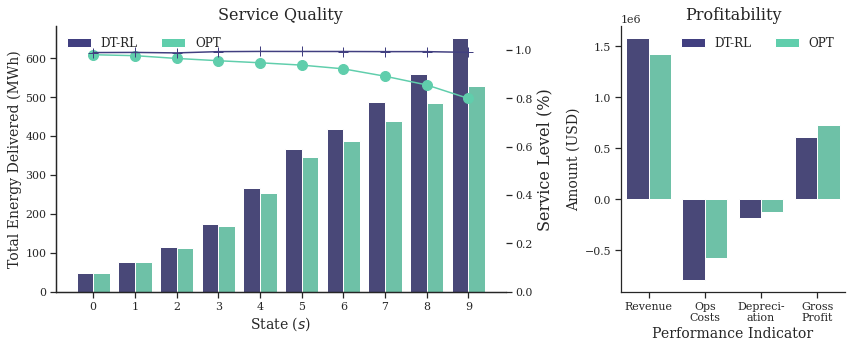

In [141]:
#gridspec_kw={'width_ratios': [3, 1]}
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5), gridspec_kw={'width_ratios': [2, 1]})
colors = sns.color_palette(palette, n_colors=9)
color_RL = colors[2]
color_RL2 = colors[3]
color_OPT = colors[-2]
color_OPT2 = colors[-3]

ax0=axes[0]

##### UPPER PLOT
energy_grouped["EV_consumption_MWh_full"] = energy_grouped["EV_consumption_MWh"]*2

sns.barplot(x="state",y="EV_consumption_MWh_full",hue="solution",data=energy_grouped,ax=ax0,hue_order=order,palette=[color_RL,color_OPT])

ax0.set_title("Service Quality",fontsize=16)
ax0.set_xlabel("State ($s$)",fontsize=14)
ax0.set_ylabel("Total Energy Delivered (MWh)",fontsize=14)
legend_elements = [Patch(facecolor=color_RL, edgecolor="white",label='DT-RL'),
                   Patch(facecolor=color_OPT, edgecolor="white",label='OPT')]
ax0.legend(handles=legend_elements,loc="upper left",frameon=False,fontsize=12,ncol=2)

###### LOWER PLOT

ax1 = ax0.twinx()

ax1.plot(requests_grouped[requests_grouped["solution"]=="Opt"]["state"],
         requests_grouped[requests_grouped["solution"]=="Opt"]["service_level"],"o-",color=color_OPT,markersize="10")

ax1.plot(requests_grouped[requests_grouped["solution"]=="RL"]["state"],
         requests_grouped[requests_grouped["solution"]=="RL"]["service_level"],"+-",color=color_RL,markersize="10")

ax1.set_ylabel("Service Level (%)", fontsize=16)
ax1.set_ylim(0,1.1)
    
sns.despine(ax=ax0, left=False, bottom=False)
sns.despine(ax=ax1)

ax=axes[1]
sns.barplot(ax=ax,data=profit_plot_data[profit_plot_data["KPI"].isin(["EV_Revenue_USD_full","EV_Ops_Costs_USD_full","EV_Deprec_Costs_USD_full","EV_GrossProfit_USD_full"])],x="KPI",y="value",
            hue="solution",
            hue_order=order,palette=[color_RL,color_OPT],
           order=["EV_Revenue_USD_full","EV_Ops_Costs_USD_full","EV_Deprec_Costs_USD_full","EV_GrossProfit_USD_full"])

ax.set_title("Profitability",fontsize=16)
ax.set_ylabel("Amount (USD)",fontsize=14)
ax.set_xlabel("Performance Indicator",fontsize=14)
ax.set_xticklabels(['Revenue', 'Ops\nCosts', 'Depreci-\nation', 'Gross\nProfit'])

legend_elements = [Patch(facecolor=color_RL, edgecolor="white",label='DT-RL'),
                   Patch(facecolor=color_OPT, edgecolor="white",label='OPT')]
ax.legend(handles=legend_elements,loc="upper right",frameon=False,fontsize=12,ncol=2)
sns.despine(ax=ax, left=False, bottom=False)

plt.tight_layout()
plt.savefig("../visuals_output/KPI_benchmark.pdf")
plt.show()

In [ ]:
test